In [1]:
from util import *
from GradCam import *
from glob import glob

model = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1).to(device).eval()
inp_trans = transforms.Compose([transforms.Resize(512), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
view_trans=transforms.Compose([transforms.Resize(512), transforms.ToTensor()])


files=glob('./imagens/*')
images=[Image.open(f) for f in files]
tensors = [inp_trans(im).unsqueeze(0).to(device) for im in images]
view_tensors = [view_trans(im).unsqueeze(0).to(device) for im in images]
print(len(tensors))

gr = GradCAM(model)


cpu
13


In [2]:
import os.path as osp
import os
import matplotlib.pyplot as plt

/home/jowme/usp/tcc/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


wing
./imagens/aviao.jpg
aviao
tabby, tabby cat
./imagens/cat.jpg
cat
warplane, military plane
./imagens/aviao3.jpg
aviao3
turnstile
./imagens/biblioteca.jpg
biblioteca
worm fence, snake fence, snake-rail fence, Virginia fence
./imagens/arvore.jpg
arvore
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
./imagens/polar-bear-7.jpg
polar-bear-7
clumber, clumber spaniel
./imagens/cao-labrador.jpg
cao-labrador
airliner
./imagens/aviao2.jpg
aviao2
mouse, computer mouse
./imagens/IMG_20240402_152745.jpg
IMG_20240402_152745
minivan
./imagens/carro.jpeg
carro
common iguana, iguana, Iguana iguana
./imagens/iguana.jpg
iguana


/tmp/ipykernel_26815/2242814042.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(32, 16)


Great Dane
./imagens/cachorro.jpg
cachorro
mountain bike, all-terrain bike, off-roader
./imagens/bicicleta.jpg
bicicleta


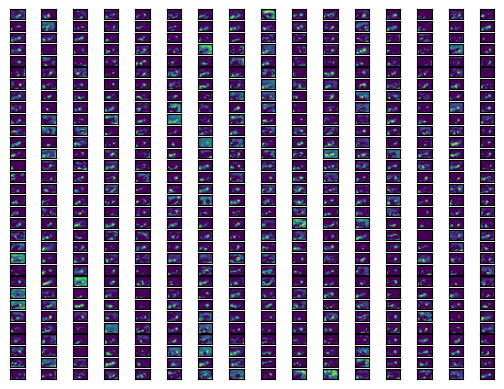

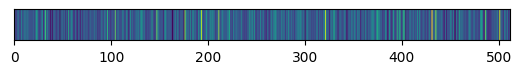

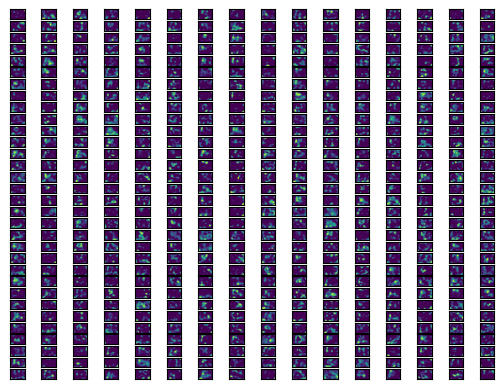

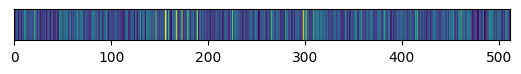

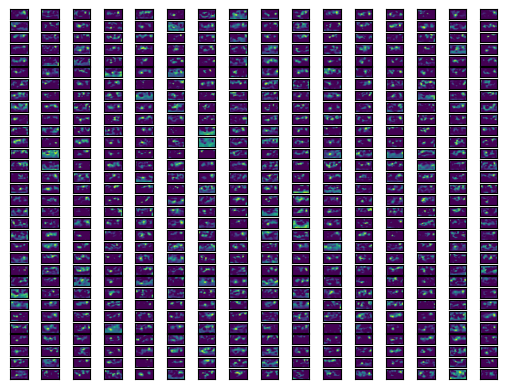

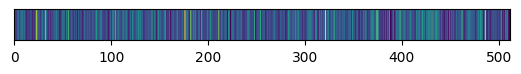

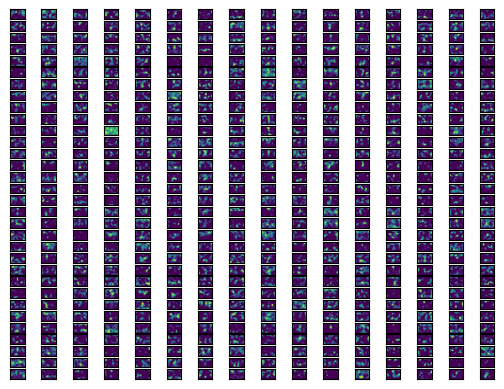

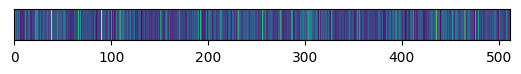

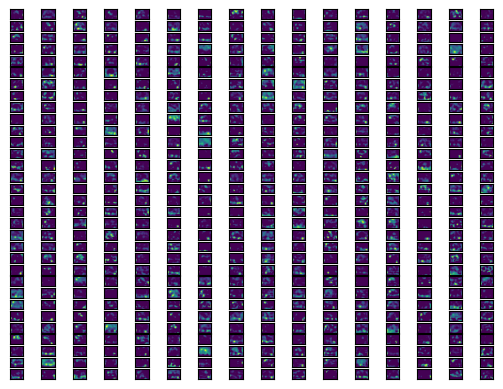

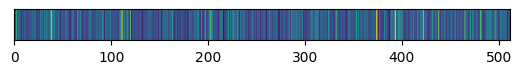

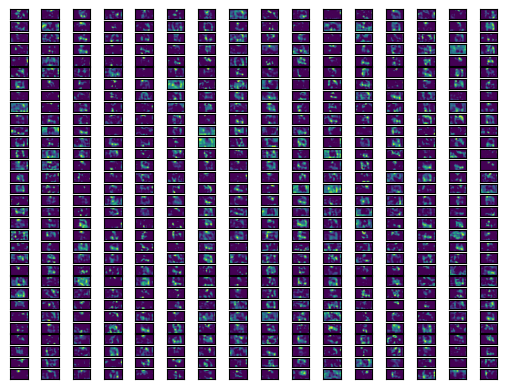

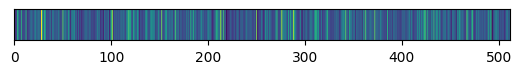

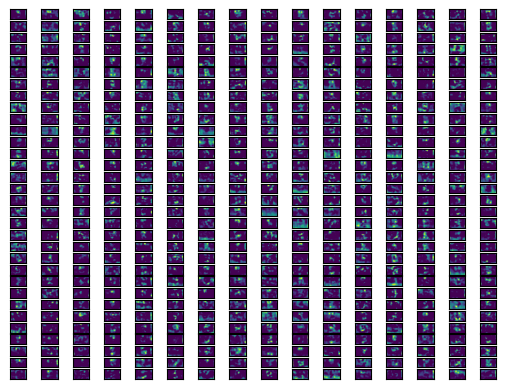

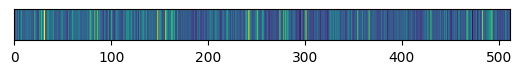

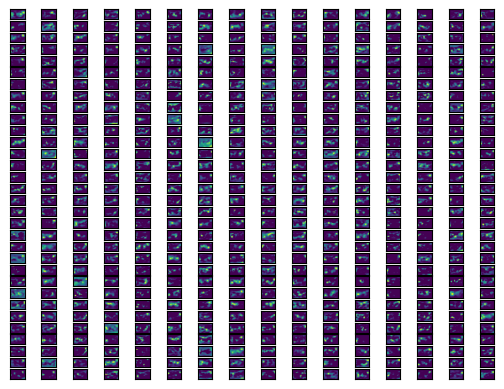

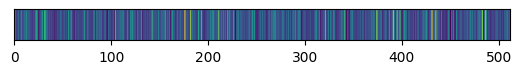

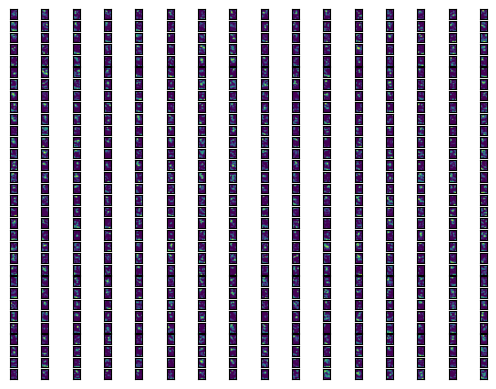

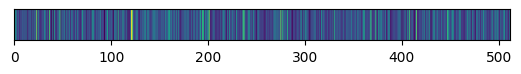

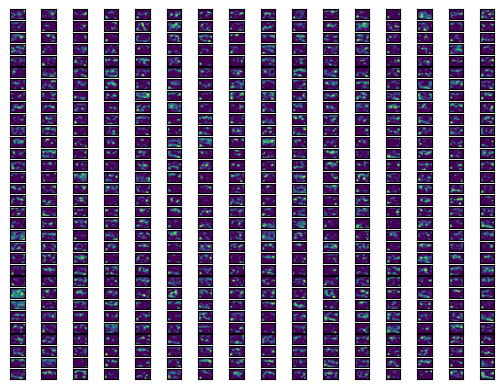

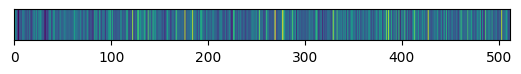

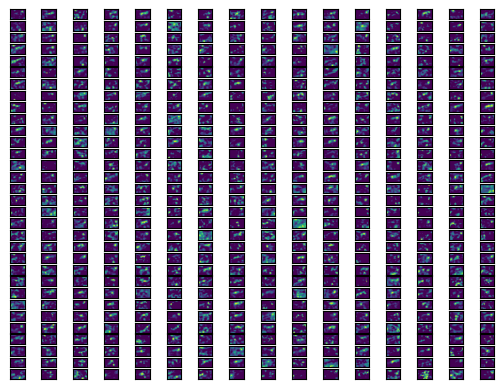

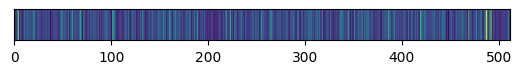

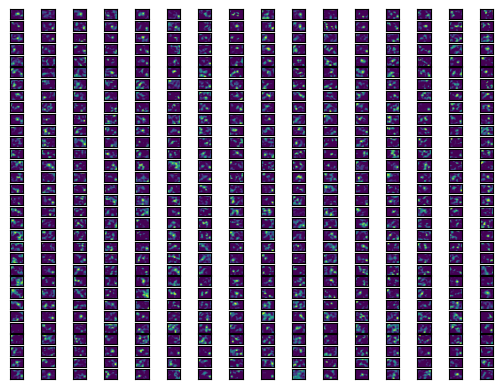

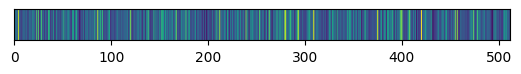

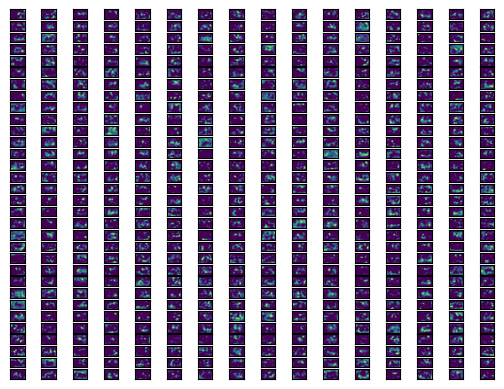

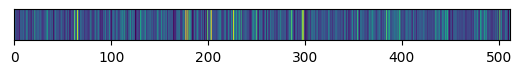

In [3]:
import re
for idx, file in enumerate(files):
    gr.forward(tensors[idx])
    activations = gr.activations.squeeze(0)
    print(file)
    nome = re.search(r'\/([^\/]+)\.(png|jpg|jpeg)', file).group(1)
    print(nome)
    saida = osp.join('output', f'{nome}_activations.png')
    
    fig, axs = plt.subplots(32, 16)
    for row in range(32):
        for column in range(16):
            axs[row, column].imshow(activations[row*16 + column, : , :].detach().numpy())
            axs[row, column].get_xaxis().set_visible(False)
            axs[row, column].get_yaxis().set_visible(False)
    fig.savefig(saida, dpi=500, bbox_inches='tight')

    alpha = gr.gradients.squeeze(0).mean((1, 2))
    alpha = (alpha  - alpha.min())/(alpha.max() - alpha.min())
    alpha = torch.as_strided(alpha, (32, 512), (0, *alpha.stride()))

    saida = osp.join('output', f'{nome}_alphas.png')
    fig, ax = plt.subplots()
    ax.get_yaxis().set_visible(False)
    ax.imshow(alpha)
    fig.savefig(saida, dpi=500, bbox_inches='tight')

In [4]:
alpha = gr.gradients.squeeze(0).mean((1, 2))

In [5]:
alpha = (alpha  - alpha.min())/(alpha.max() - alpha.min())

In [6]:
alpha = torch.as_strided(alpha, (32, 512), (0, *alpha.stride()))

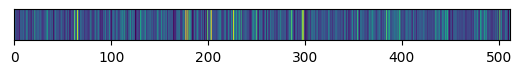

In [7]:
plt.gca().get_yaxis().set_visible(False)
plt.imshow(alpha)

In [8]:
alpha.max()

tensor(1.)

In [9]:
n = alpha.numpy()